<a href="https://colab.research.google.com/github/OtolaHan/Otola_Han_KAAN/blob/main/lab_3_data_mining_%D0%9F%D1%80%D0%B5%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81%D0%B8%D0%BD%D0%B3_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2(6_8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [2]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [3]:
import nltk



def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs.data:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

def format_labels(target, docs):
    """ format the labels """
    return docs.target_names[target]

def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

In [4]:
import pandas as pd

# сделать фрейм данных из списка
X = pd.DataFrame.from_records(format_rows(twenty_train), columns= ['text'])

In [5]:
# Добавить category в фрейм
X['category'] = twenty_train.target

In [6]:
# Добавить название категории
X['category_name'] = X.category.apply(lambda t: format_labels(t, twenty_train))

## 5. Предварительная обработка данных
На курсе Data Mining мы узнали о множестве способов выполнения предварительной обработки данных. В действительности, этот список довольно общий, поскольку особенности предварительной обработки данных слишком велики, чтобы их можно было охватить в одном курсе. Это особенно актуально, когда вы имеете дело с неструктурированными данными, как мы это делаем в этой конкретной записной книжке. Но давайте рассмотрим несколько примеров для каждого метода предварительной обработки данных, который мы изучили в классе. Мы рассмотрим каждый пункт по отдельности и предоставим пример кода для каждой категории. Вы узнаете, как выполнять каждую из операций с помощью Pandas, которые охватывают основы предварительной обработки в Data Mining. Мы не будем следовать какому-либо строгому порядку, но элементы, которые мы рассмотрим в разделе предварительной обработки, следующие:

- Агрегирование
- Выборка
- Уменьшение размерности
- Выбор подмножества признаков
- Создание признаков
- Дискретизация и бинаризация
- Преобразование атрибутов

---

### 5.1 Выборка
Первой концепцией из вышеуказанного списка, которую мы собираемся рассмотреть, является выборка. Выборка относится к методу, используемому для выбора данных. Функциональные возможности, которые мы используем для выбора данных с помощью запросов, предоставляемых Pandas, на самом деле являются основными методами выборки. Причины для выборки иногда связаны с размером данных - мы хотим получить меньшее подмножество данных, которое по-прежнему достаточно репрезентативно по сравнению с исходным набором данных.

У нас нет проблем с размером в нашем текущем наборе данных, поскольку он содержит всего несколько тысяч записей. Но если мы обратим внимание на то, сколько контента включено в поле `text` каждой из этих записей, вы поймете, что выборка все же может быть неплохой идеей. Фактически, мы уже провели некоторую выборку, просто уменьшив количество записей, которые мы используем здесь, в этой записной книжке; помните, что мы используем только четыре категории из всех 20 доступных категорий. Давайте получим представление о том, как выполнять выборку с помощью операций pandas.

In [7]:
X_sample = X.sample(n=1000) #random state

In [8]:
len(X_sample)

1000

In [9]:
X_sample[0:4]

,text,category,category_name
971,From: mathew <mathew@mantis.co.uk> Subject: Al...,0,alt.atheism
2099,From: stusoft@hardy.u.washington.edu (Stuart D...,1,comp.graphics
1831,From: jcopelan@nyx.cs.du.edu (The One and Only...,0,alt.atheism
528,From: Eugene.Bigelow@ebay.sun.com (Geno ) Subj...,3,soc.religion.christian


---

### >>>**Упражнение 6**:
Заметили какие-либо изменения в фрейме данных `X`? Какие они? Сообщите о каждом замеченном вами изменении по сравнению с предыдущим состоянием `X`. Не стесняйтесь запрашивать и более внимательно изучать фрейм данных на предмет этих изменений.

In [56]:
# Проверка размера исходного фрейма данных
print(f"Размер исходного фрейма данных X: {len(X)} строк")

# Проверка размера выборки
print(f"Размер выборки X_sample: {len(X_sample)} строк")

# Просмотр первых 4 строк выборки
print("Первые 4 строки выборки X_sample:")
print(X_sample[0:4])

# Проверка уникальности строк в выборке
print("Уникальные категории в выборке:")
print(X_sample['category_name'].unique())

# Проверка распределения категорий в выборке
print("Распределение категорий в выборке:")
print(X_sample['category_name'].value_counts())

Размер исходного фрейма данных X: 2257 строк
Размер выборки X_sample: 1000 строк
Первые 4 строки выборки X_sample:
                                                   text  category  \
971   From: mathew <mathew@mantis.co.uk> Subject: Al...         0   
2099  From: stusoft@hardy.u.washington.edu (Stuart D...         1   
1831  From: jcopelan@nyx.cs.du.edu (The One and Only...         0   
528   From: Eugene.Bigelow@ebay.sun.com (Geno ) Subj...         3   

               category_name  
971              alt.atheism  
2099           comp.graphics  
1831             alt.atheism  
528   soc.religion.christian  
Уникальные категории в выборке:
['alt.atheism' 'comp.graphics' 'soc.religion.christian' 'sci.med']
Распределение категорий в выборке:
category_name
soc.religion.christian    277
comp.graphics             275
sci.med                   250
alt.atheism               198
Name: count, dtype: int64


---

Давайте сделаем что-нибудь крутое здесь, пока мы работаем с выборкой! Давайте посмотрим на распределение категорий как в выборке, так и в исходном наборе данных. Давайте визуализируем и проанализируем различие между двумя наборами данных. Чтобы сгенерировать некоторые визуализации, мы собираемся использовать библиотеку python `matplotlib`. С matplotlib все происходит быстрее, а с точки зрения совместимости это может быть лучшая библиотека визуализации для визуализации контента, извлеченного из фреймов данных, и при использовании записных книжек Jupyter. Давайте взглянем на волшебство `matplotlib` ниже.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

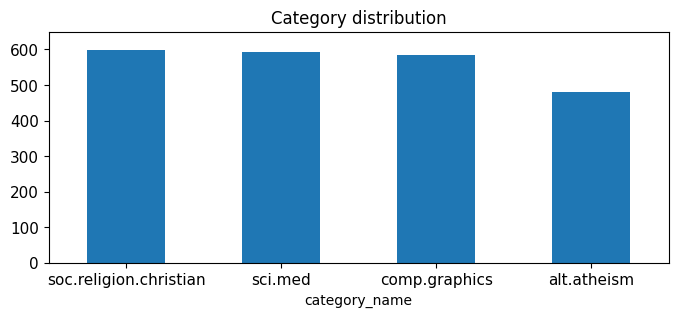

In [15]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
soc.religion.christian    277
comp.graphics             275
sci.med                   250
alt.atheism               198
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

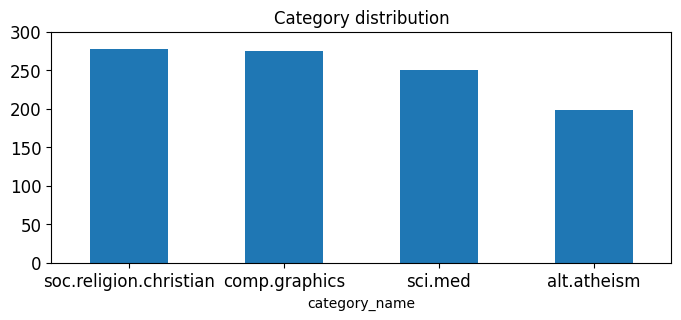

In [16]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300],
                                           rot = 0, fontsize = 12, figsize = (8,3))

Вы можете использовать следующую команду, чтобы увидеть другие доступные стили для украшения ваших диаграмм.
```python
print(plt.style.available)```

---

### >>> **Упражнение 7:**
Обратите внимание, что для параметров `ylim` мы жестко закодировали максимальное значение для y. Можно ли автоматизировать это вместо жесткого кодирования? Как бы вы это сделали? (Подсказка: посмотрите код выше, чтобы найти подсказки)

category_name
soc.religion.christian    277
comp.graphics             275
sci.med                   250
alt.atheism               198
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

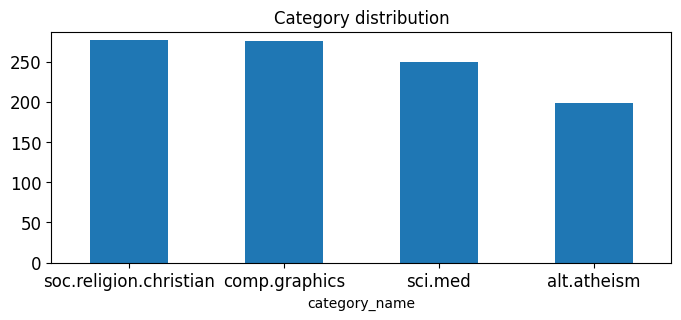

In [17]:
# Ответьте здесь
upper_bound = max(X_sample.category_name.value_counts()) + 10

print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound],
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Упражнение 8:**
Мы также можем выполнить сравнение распределения между двумя наборами данных рядом, но, возможно, вы можете попробовать это в качестве упражнения. Ниже мы покажем вам снимок типа диаграммы, который мы ищем.

![alt txt](https://i.imgur.com/9eO431H.png)

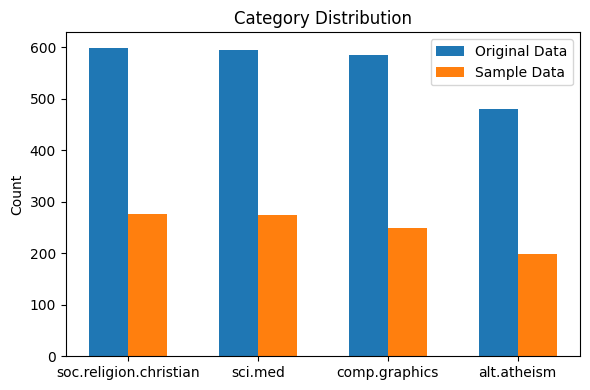

In [55]:
# Ответьте здесь
# Получаем данные из исходного датафрейма и выборки
full_data = X.category_name.value_counts()
sample_data = X_sample.category_name.value_counts()

# Создаем один график
plt.figure(figsize=(6, 4))

# Создаем сгруппированные столбцы
x = range(len(full_data))
width = 0.3  # ширина столбцов

plt.bar([i - width/2 for i in x], full_data, width, label='Original Data')
plt.bar([i + width/2 for i in x], sample_data, width, label='Sample Data')

# Настройка графика
plt.title('Category Distribution')
plt.ylabel('Count')
plt.xticks(x, full_data.index, rotation=0)
plt.legend()

# Автоматическая настройка layout
plt.tight_layout()

plt.show()

Одной из особенностей обоих наборов данных является то, что распределение категорий остается относительно одинаковым, что является хорошим знаком для нас, специалистов по анализу данных. Существует множество способов выполнить выборку в наборе данных и при этом получить достаточно представительный набор данных. Это не является основной темой этой записной книжки, но если вы хотите узнать больше о выборке и о том, как работает функция `sample`, просто обратитесь к документации Pandas, и вы найдете интересные способы проведения более продвинутой выборки.

---

---